In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
#read data, simple transforms
df = pd.read_csv("../Data/WorkingDataSet_3-16-2016.csv", low_memory=False)
df.ix[:,22] =  pd.to_datetime(df.ix[:,22], infer_datetime_format=True)
df['First New Reservation Request Date Year'] = df.ix[:,22].dt.year

In [ ]:
#df.head
#df.describe()
#df.columns
#data for San Jose
sj_df = df[df.ix[:,18] == "San Jose"].copy()

In [ ]:
#SEI in San Jose
sei_names_sj = sj_df.ix[:,44]
sei_n_projects = sei_names_sj.value_counts()

In [ ]:
#transform to the date format
sj_df.ix[:,22] =  pd.to_datetime(sj_df.ix[:,22], infer_datetime_format=True)
#see time range
#sj_df.ix[:,22].min()
#sj_df.ix[:,22].max()
#take year only
sj_df['First New Reservation Request Date Year'] = sj_df.ix[:,22].dt.year

In [ ]:
#select project for the biggest SEI
#sei_df = sj_df[sj_df.ix[:,44] == "PETERSEN-DEAN INC. dba PETERSENDEAN"] - direct call
sei_df = sj_df[sj_df.ix[:,44] == sei_n_projects.index[0]]

In [ ]:
#number of projects per year
sei_df['First New Reservation Request Date Year'].value_counts()

In [ ]:
#type of a project
project_types_sj = sj_df.ix[:,2]
project_types_sj.value_counts()

In [ ]:
#type of a project
project_types_sj = sj_df.ix[:,15]
project_types_sj.value_counts()

In [ ]:
#type of a project
project_types_sj = sj_df.ix[:,17]
project_types_sj.value_counts()

In [ ]:
#column names 
i = 0
for column in sj_df.columns:
    print((i, column))
    i += 1

In [ ]:
#modules in use
module_types = sj_df['PV Module#1 Model']
module_types.value_counts()

In [ ]:
#modules in use whole data set
df['PV Module#1 Model'].value_counts()

In [2]:
#read data
df1 = pd.read_csv("../Data/NEM_CurrentlyInterconnectedDataset_2016-01-31.csv", low_memory=False)


In [21]:
#column labels
i = 0
for column in df1.columns:
    print((i, column))
    i += 1

(0, 'Application Id')
(1, 'Matched CSI Application Number')
(2, 'Utility')
(3, 'Service City')
(4, 'Service Zip')
(5, 'Service County')
(6, 'Technology Type')
(7, 'System Size DC')
(8, 'System Size AC')
(9, 'Tilt')
(10, 'Azimuth')
(11, 'Mounting Method')
(12, 'Tracking')
(13, 'Customer Sector')
(14, 'App Received Date')
(15, 'App Complete Date')
(16, 'App Approved Date')
(17, 'Self Installer')
(18, 'Installer Name')
(19, 'Installer Phone')
(20, 'Installer City')
(21, 'Installer State')
(22, 'Installer Zip')
(23, 'Third Party Owned')
(24, 'Third Party Owned Type')
(25, 'Third Party Name')
(26, 'Pace Financed')
(27, 'Pace Financier')
(28, 'Electric Vehicle')
(29, 'Electric Vehicle Count')
(30, 'System Output Monitoring')
(31, 'System Output Reports To Vendor?')
(32, 'System Output Monitoring Provider')
(33, 'Total System Cost')
(34, 'Itc Cost Basis')
(35, 'Previous Application')
(36, 'Previous Application Ids')
(37, 'Application Status')
(38, 'Project is VNEM, NEM-V, NEM-Agg?')
(39, 'VNE

In [3]:
#get year from date
df1.ix[:,15] =  pd.to_datetime(df1.ix[:,15], infer_datetime_format=True)
df1['App Complete Date Year'] = df1.ix[:,15].dt.year

In [4]:
#modules in use
df1[df1['App Complete Date Year'] > 2014]['Module Model 1'].value_counts()

REC260PE              16951
KU265-6ZPA             8206
YL255P-29b             6008
KU260-6XPA             5367
SPR-327NE-WHT-D        4211
SW 280 Mono Black      3841
SPR-E20-327            3605
REC260PE(BLK)          3113
YL250P-29b             2877
SPR-X21-345            2636
SW 285 Mono            2428
TSM-255PA05.18         1952
REC275TP               1952
LG280S1C-B3            1915
SW 275 Mono Black      1519
LG305N1C-B3            1388
CS6P-260P              1334
CS6P-255P              1274
PM250M01_265           1179
SPR-230NE-BLK-D        1163
REC260PE Z-LINK        1144
SW250 Poly             1141
Q.PRO BFR - G3 260     1107
TSM-250PA05.05         1103
KU255-6XCA              993
TSM-260PD05.08          956
SW 280 mono             893
SW 280 Mono             865
TSM-250PA05.18          799
PM245P01_255            787
                      ...  
ESP6-72-300/SI            1
285 mono                  1
LS250-60M-B               1
Conergy P 235PA           1
LW250(29)P1640x990  

In [ ]:
#biggest installers in 2015-2016
df1[df1['App Complete Date Year'] > 2014]['Installer Name'].value_counts()

In [5]:
#selection for SolarCity
solarcity_names = ['SolarCity Corporation', 'SolarCity', 'SolarCityMH', 'SOLARCITY', 'solarcity']
df1[(df1['App Complete Date Year'] > 2014) & (df1['Installer Name'].isin(solarcity_names))][['Installer Name']].count
#df1[(df1['App Complete Date Year'] > 2014)][['Installer Name']].count

<bound method DataFrame.count of                             Installer Name
239     Talbott Solar & Radiant Homes Inc.
1913       SolarCity Corporation - Tiffany
1914       SolarCity Corporation - Tiffany
1915       SolarCity Corporation - Tiffany
1916       SolarCity Corporation - Tiffany
1919       SolarCity Corporation - Tiffany
1926       SolarCity Corporation - Tiffany
1929       SolarCity Corporation - Tiffany
1931       SolarCity Corporation - Tiffany
1938       SolarCity Corporation - Tiffany
1946       SolarCity Corporation - Tiffany
1947       SolarCity Corporation - Tiffany
1949       SolarCity Corporation - Tiffany
1951       SolarCity Corporation - Tiffany
1953       SolarCity Corporation - Tiffany
1955       SolarCity Corporation - Tiffany
1957       SolarCity Corporation - Tiffany
1962       SolarCity Corporation - Tiffany
1963       SolarCity Corporation - Tiffany
1964       SolarCity Corporation - Tiffany
1968       SolarCity Corporation - Tiffany
1970       SolarCity 

In [ ]:
#number of projects over the years
df1['App Complete Date Year'].value_counts()

In [6]:
#selection for SolarCity
ss_df = df1[(df1['App Complete Date Year'] > 2014) & (df1['Installer Name'].isin(solarcity_names))]

In [ ]:
#check dataframe
ss_df.describe()
ss_df.shape
ss_df.head()

In [ ]:
#most common module
ss_df['Module Model 1'].value_counts()

In [ ]:
#most common manufacturer
ss_df['Module Manufacturer 1'].value_counts()

In [26]:
ss_df = ss_df[(ss_df.T != 0).all()]
ss_df['Price_per_Watt'] = ss_df['Total System Cost']/ss_df['System Size DC']/1000

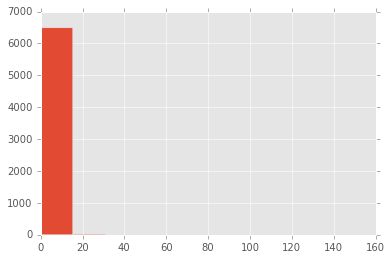

In [27]:
ss_df['Price_per_Watt'][ss_df['Total System Cost'] < 180000].hist()

In [29]:
ss_df['Price_per_Watt'][ss_df['Price_per_Watt'] < 10].describe()

count    6475.000000
mean        5.580059
std         0.604666
min         0.000058
25%         5.661630
50%         5.681605
75%         5.715758
max         9.807767
Name: Price_per_Watt, dtype: float64

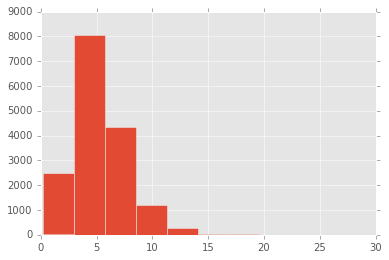

In [7]:
#dataframe for most popular module
ss_rec260pe_df = ss_df[ss_df['Module Model 1'] == 'REC260PE']
ss_rec260pe_df['System Size DC'].hist()

In [8]:
#ols models
import statsmodels.formula.api as sm

In [9]:
#rename columns - no spaces
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"System Size DC": "System_Size_DC", "Total System Cost":"Total_System_Cost"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Module Quantity 1": "Module_Quantity_1", "Service Zip": "Service_Zip", "Inverter Model 1":"Inverter_Model_1"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Inverter Quantity 1": "Inverter_Quantity_1"})

In [10]:
#rename columns - no spaces
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Customer Sector": "Customer_Sector"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"System Size AC": "System_Size_AC"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Service County": "Service_County"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Service City": "Service_City"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Installer Zip": "Installer_Zip"})

In [11]:
#short data set for ols estimation
ss_rec260pe_df_short = ss_rec260pe_df[['Total_System_Cost', 'System_Size_DC', 'System_Size_AC', 'Service_Zip', 'Inverter_Model_1', 'Module_Quantity_1', \
                                       'Inverter_Quantity_1', 'Tracking', 'Customer_Sector', 'Utility', 'Service_County', 'Service_City', 'Installer_Zip']]
ss_rec260pe_df_ols = ss_rec260pe_df_short.dropna()
ss_rec260pe_df_ols = ss_rec260pe_df_ols.copy()
#drop rows with at least one zero
ss_rec260pe_df_ols = ss_rec260pe_df_ols[(ss_rec260pe_df_ols.T != 0).all()]
ss_rec260pe_df_ols = ss_rec260pe_df_ols[(ss_rec260pe_df_ols["Service_Zip"] > 10000.0)]
ss_rec260pe_df_ols["Service_Zip_Cat"] = ss_rec260pe_df_ols["Service_Zip"].astype(int).astype('category')
ss_rec260pe_df_ols["Inverter_Model_1_Cat"] = ss_rec260pe_df_ols["Inverter_Model_1"].astype('category')
ss_rec260pe_df_ols["Tracking_Cat"] = ss_rec260pe_df_ols["Tracking"].astype('category')
ss_rec260pe_df_ols["Utility_Cat"] = ss_rec260pe_df_ols["Utility"].astype('category')
#create dummies for zip code, not used for now
ss_rec260pe_df_ols_dummies = pd.get_dummies(ss_rec260pe_df_ols["Service_Zip_Cat"], prefix='zipd')

In [12]:
#model for System cost, drop outliers
ss_rec260pe_df_ols['System_Size_DC_Sqr'] = ss_rec260pe_df_ols['System_Size_DC'] * ss_rec260pe_df_ols['System_Size_DC']
ss_rec260pe_df_ols['Big_Project'] = np.sign(ss_rec260pe_df_ols['Total_System_Cost'] - 180000)
res = sm.ols(formula="Total_System_Cost~System_Size_DC+System_Size_DC_Sqr+Module_Quantity_1+C(Utility)+C(Inverter_Model_1)", \
             data=ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]).fit()
#model for outliers, not used, not enough data
#res = sm.ols(formula="Total_System_Cost~System_Size_DC+System_Size_DC_Sqr+Module_Quantity_1+C(Utility)", \
#             data=ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] >= 180000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_System_Cost   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     871.0
Date:                Mon, 04 Apr 2016   Prob (F-statistic):               0.00
Time:                        08:57:43   Log-Likelihood:                -23414.
No. Observations:                2527   AIC:                         4.697e+04
Df Residuals:                    2457   BIC:                         4.738e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------

In [ ]:
#graph predictions
predictions = res.predict(ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000])
ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]['Total_System_Cost_Est'] = predictions
ss_rec260pe_df_ols[['Total_System_Cost_Est', 'Total_System_Cost']][ss_rec260pe_df_ols['Total_System_Cost'] < 180000].plot()

In [13]:
#model for system size, drop outliers
res = sm.ols(formula="System_Size_DC~Module_Quantity_1+C(Inverter_Model_1_Cat)+Inverter_Quantity_1", \
             data=ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         System_Size_DC   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 04 Apr 2016   Prob (F-statistic):               0.00
Time:                        08:57:49   Log-Likelihood:                -3414.6
No. Observations:                2527   AIC:                             6963.
Df Residuals:                    2460   BIC:                             7354.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

In [ ]:
#look at correlations
ss_rec260pe_df_ols.corr()

In [ ]:
#look at correlations
ss_rec260pe_df.corr()

In [14]:
ss_rec260pe_df_ols_filtered = ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]

In [18]:
ss_rec260pe_df_ols_filtered['Price_per_Watt'] = ss_rec260pe_df_ols_filtered['Total_System_Cost']/ss_rec260pe_df_ols_filtered['System_Size_DC']/1000

/Users/wilfeli/anaconda/envs/datas/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


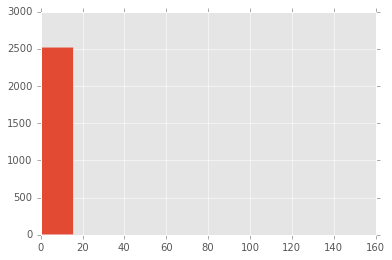

In [19]:
ss_rec260pe_df_ols_filtered['Price_per_Watt'].hist()

In [20]:
ss_rec260pe_df_ols_filtered.head()

,Total_System_Cost,System_Size_DC,System_Size_AC,Service_Zip,Inverter_Model_1,Module_Quantity_1,Inverter_Quantity_1,Tracking,Customer_Sector,Utility,Service_County,Service_City,Installer_Zip,Service_Zip_Cat,Inverter_Model_1_Cat,Tracking_Cat,Utility_Cat,System_Size_DC_Sqr,Big_Project,Price_per_Watt
114907,21299.2,3.7488,3.598848,94503.0,PVI-3.0-OUTD-S-US-Z-A (240V),16.0,1.0,Fixed,Residential,PGE,Napa,AMERICAN CANYON,89119.0,94503,PVI-3.0-OUTD-S-US-Z-A (240V),Fixed,PGE,14.053501,-1.0,5.681605
114924,14643.2,2.5773,2.474208,93444.0,PVI-3.0-OUTD-S-US-Z-A (240V),11.0,1.0,Fixed,Residential,PGE,San Luis Obispo,NIPOMO,89119.0,93444,PVI-3.0-OUTD-S-US-Z-A (240V),Fixed,PGE,6.642475,-1.0,5.681605
115022,15974.4,2.8116,2.699136,93455.0,PVI-3.0-OUTD-S-US-Z-A (240V),12.0,1.0,Fixed,Residential,PGE,Santa Barbara,SANTA MARIA,89119.0,93455,PVI-3.0-OUTD-S-US-Z-A (240V),Fixed,PGE,7.905095,-1.0,5.681605
115027,14643.2,2.5773,2.474208,94952.0,PVI-3.0-OUTD-S-US-Z-A (240V),11.0,1.0,Fixed,Residential,PGE,Sonoma,PETALUMA,89119.0,94952,PVI-3.0-OUTD-S-US-Z-A (240V),Fixed,PGE,6.642475,-1.0,5.681605
115029,11980.8,2.1087,2.024352,94559.0,PVI-3.0-OUTD-S-US-Z-A (240V),9.0,1.0,Fixed,Residential,PGE,Napa,NAPA,89119.0,94559,PVI-3.0-OUTD-S-US-Z-A (240V),Fixed,PGE,4.446616,-1.0,5.681605
